In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
plt.style.use('dark_background')

In [2]:
nodes = np.load("/fsx/CASES/zen30az000_OS7/gir_panels.pkl",allow_pickle=True)

In [3]:
gir_mean_pressure = [x['gir_mean_pressure'] for x in nodes]
nodes_xyz  = np.array([np.asanyarray([x['xyz'] for x in nodes[k]['gir_panels'][0]]) for k in range(len(nodes))])
diff_gir_a_pressure  = np.array([np.asanyarray([x['pressure'] for x in nodes[k]['gir_panels'][0]]) - gir_mean_pressure[k] for k in range(len(nodes))])
np.array(diff_gir_a_pressure).shape,np.array(nodes_xyz).shape



((1000, 1395), (1000, 1395, 3))

NameError: name 'fig' is not defined

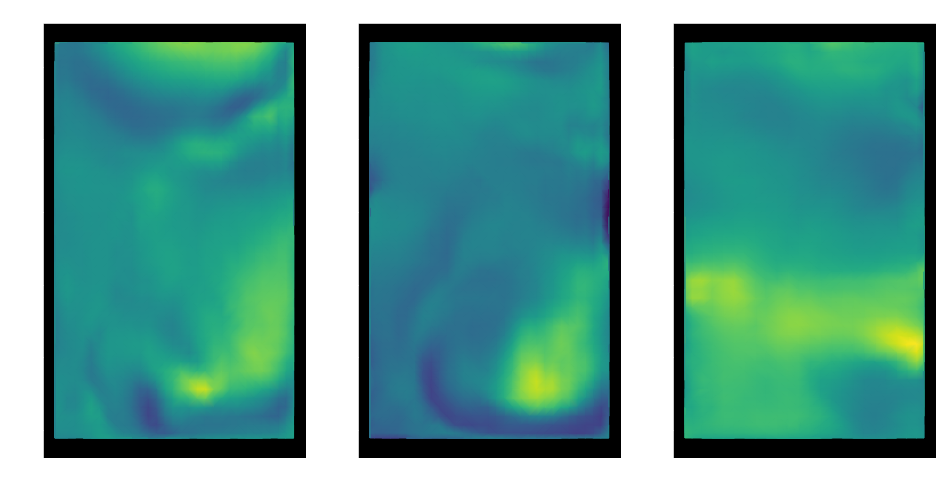

In [4]:
for time_id in range(1000):

    fig1, axs = plt.subplots(ncols=3,figsize=(16,8), sharey=True, squeeze=True)

    nodes_xyz  = np.array([np.asanyarray([x['xyz'] for x in nodes[k]['gir_panels'][0]]) for k in range(len(nodes))])
    diff_gir_pressure  = np.array([np.asanyarray([x['pressure'] for x in nodes[k]['gir_panels'][0]]) - gir_mean_pressure[k] for k in range(len(nodes))])
    xa = nodes_xyz[time_id,:,1].ravel()
    za = nodes_xyz[time_id,:,2].ravel()
    dpa = diff_gir_pressure[time_id,:]

    nodes_xyz  = np.array([np.asanyarray([x['xyz'] for x in nodes[k]['gir_panels'][1]]) for k in range(len(nodes))])
    diff_gir_pressure  = np.array([np.asanyarray([x['pressure'] for x in nodes[k]['gir_panels'][1]]) - gir_mean_pressure[k] for k in range(len(nodes))])
    xb = nodes_xyz[time_id,:,1].ravel()
    zb = nodes_xyz[time_id,:,2].ravel()
    dpb = diff_gir_pressure[time_id,:]

    nodes_xyz  = np.array([np.asanyarray([x['xyz'] for x in nodes[k]['gir_panels'][2]]) for k in range(len(nodes))])
    diff_gir_pressure  = np.array([np.asanyarray([x['pressure'] for x in nodes[k]['gir_panels'][2]]) - gir_mean_pressure[k] for k in range(len(nodes))])
    yc = nodes_xyz[time_id,:,0].ravel()
    zc = nodes_xyz[time_id,:,2].ravel()
    dpc = diff_gir_pressure[time_id,:]

    dp = np.hstack([dpa,dpb,dpc]).ravel()
    dp_max = dp.max()
    dp_min = dp.min()

    triang = tri.Triangulation(xa,za)
    ax = axs[0]
    ax.set_title("Panel A")
    ax.set_xlabel("X [m]")
    ax.set_ylabel("Z [m]")
    #ax.set_aspect('equal')
    tpc = ax.tripcolor(triang, dpa, shading='gouraud',vmin=dp_min, vmax=dp_max)

    triang = tri.Triangulation(xb,zb)
    ax = axs[1]
    ax.set_xlabel("X [m]")
    ax.set_title("Panel B")
    #ax.set_aspect('equal')
    tpc = ax.tripcolor(triang, dpb, shading='gouraud',vmin=dp_min, vmax=dp_max)

    triang = tri.Triangulation(yc,zc)
    ax = axs[2]
    ax.set_xlabel("Y [m]")
    ax.set_title("Panel C")
    #ax.set_aspect('equal')
    tpc = ax.tripcolor(triang, dpc, shading='gouraud',vmin=dp_min, vmax=dp_max)
    fig.colorbar(tpc,ax=ax,label="Dynamic pressure [Pa]")
    plt.savefig("dynp/dynp_%04d.png" % time_id, dpi=150, bbox_inches='tight')
    plt.close(fig)

In [5]:
nodes[0].keys(),len(nodes[0]['gir_panels']),len(nodes[0]['gir_panels'][0]),nodes[0]['gir_panels'][0][0].keys()

(dict_keys(['telescope_mean_pressure', 'gir_mean_pressure', 'gir_panels']),
 3,
 1395,
 dict_keys(['pressure', 'area_ijk', 'xyz']))

In [6]:
telescope_mean_pressure = [x['telescope_mean_pressure'] for x in nodes]
gir_mean_pressure = [x['gir_mean_pressure'] for x in nodes]
gir_a_pressure  = [np.mean([x['pressure'] for x in nodes[k]['gir_panels'][0]]) for k in range(len(nodes))]
gir_b_pressure  = [np.mean([x['pressure'] for x in nodes[k]['gir_panels'][1]]) for k in range(len(nodes))]
gir_c_pressure  = [np.mean([x['pressure'] for x in nodes[k]['gir_panels'][2]]) for k in range(len(nodes))]

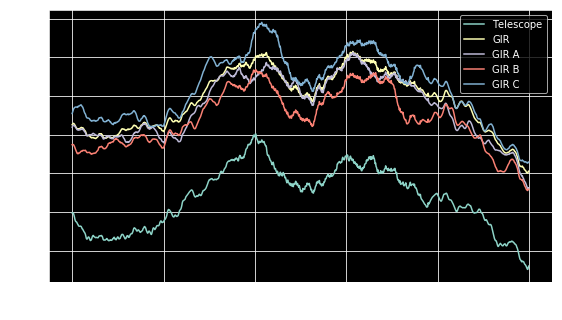

In [7]:
t = np.arange(len(telescope_mean_pressure))/20
fig,ax = plt.subplots(figsize=(9,5))
ax.plot(t,telescope_mean_pressure,label='Telescope')
ax.plot(t,gir_mean_pressure,label='GIR')
ax.plot(t,gir_a_pressure,label='GIR A')
ax.plot(t,gir_b_pressure,label='GIR B')
ax.plot(t,gir_c_pressure,label='GIR C')
ax.grid()
ax.legend()
ax.set_xlabel('Time [s]')
ax.set_ylabel('Pressure [Pa]');

In [6]:
diff_gir_a_pressure  = [np.mean(np.asanyarray([x['pressure'] for x in nodes[k]['gir_panels'][0]]) - gir_mean_pressure[k]) for k in range(len(nodes))]
diff_gir_b_pressure  = [np.mean(np.asanyarray([x['pressure'] for x in nodes[k]['gir_panels'][1]]) - gir_mean_pressure[k]) for k in range(len(nodes))]
diff_gir_c_pressure  = [np.mean(np.asanyarray([x['pressure'] for x in nodes[k]['gir_panels'][2]]) - gir_mean_pressure[k]) for k in range(len(nodes))]

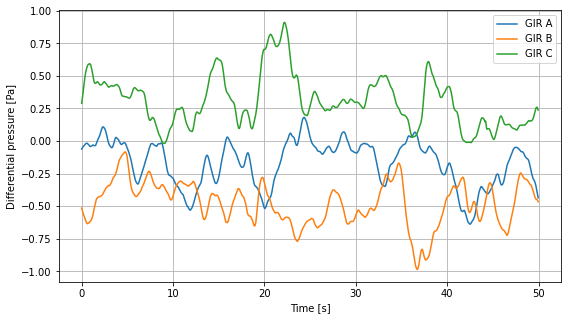

In [8]:
t = np.arange(len(telescope_mean_pressure))/20
fig,ax = plt.subplots(figsize=(9,5))
#ax.plot(t,telescope_mean_pressure,label='Telescope')
#ax.plot(t,gir_mean_pressure,label='GIR')
ax.plot(t,diff_gir_a_pressure,label='GIR A')
ax.plot(t,diff_gir_b_pressure,label='GIR B')
ax.plot(t,diff_gir_c_pressure,label='GIR C')
ax.grid()
ax.legend()
ax.set_xlabel('Time [s]')
ax.set_ylabel('Differential pressure [Pa]');

In [31]:
gmacs = np.load("/fsx/CASES/zen30az090_CD17/gmacs.pkl",allow_pickle=True)

Text(0.5, 0, 'Time [s]')

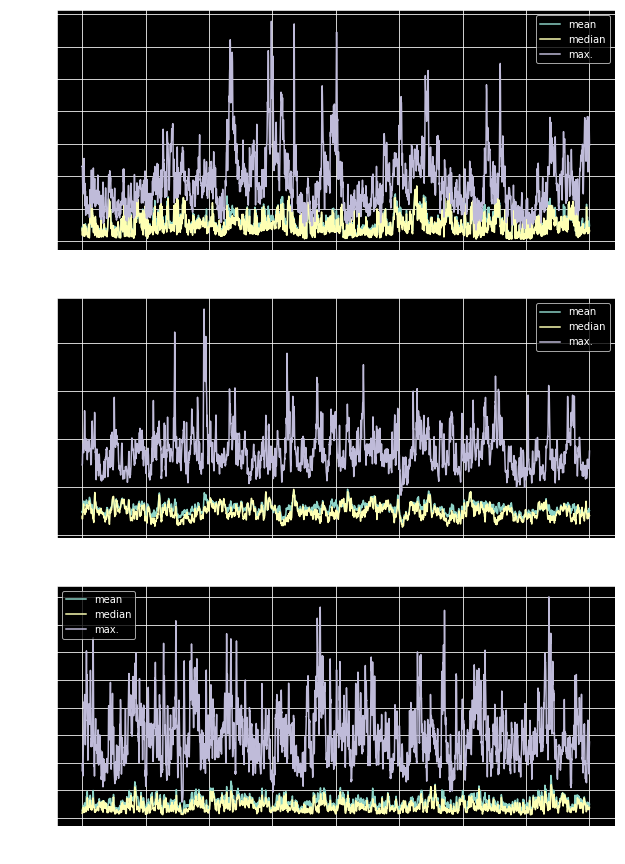

In [32]:
mean = np.asarray([x['mean'] for x in gmacs])
median = np.asarray([x['median'] for x in gmacs])
minmax = np.asarray([x['minmax'] for x in gmacs])
t = np.arange(mean.shape[0])/20
fig,ax = plt.subplots(nrows=3,figsize=(10,15),sharex=True)
gir = ['A','B','C']
for i in range(3):
    ax[i].plot(t,mean[:,i],label='mean')
    ax[i].plot(t,median[:,i],label='median')
    ax[i].plot(t,minmax[:,i,1],label='max.')
    ax[i].grid()
    ax[i].set_ylabel(gir[i]+" Force Mag. [N]")
    ax[i].legend()
ax[2].set_xlabel('Time [s]')

In [33]:
gir_fi = np.array([x['gir_integrated_force'] for x in gmacs])

In [34]:
fi = np.array([x['integrated_force'] for x in gmacs])

In [35]:
fi[:,0,:].mean(0),fi[:,0,:].std(0),fi[:,0,:].min(0),fi[:,0,:].max(0)

(array([ 4.41089870e+00, -4.90967327e-09,  2.83461566e-09]),
 array([6.28934472e+00, 1.05244287e-08, 6.07630069e-09]),
 array([-1.63932162e+01, -3.64801488e-08, -1.62537163e-08]),
 array([2.30561958e+01, 2.81521702e-08, 2.10618947e-08]))

In [36]:
fi[:,1,:].mean(0),fi[:,1,:].std(0),fi[:,1,:].min(0),fi[:,1,:].max(0)

(array([-7.24076090e+01,  9.14293364e-08, -5.27868484e-08]),
 array([1.73573604e+01, 4.99279162e-08, 2.88259135e-08]),
 array([-1.31669870e+02, -5.58605018e-08, -1.69005190e-07]),
 array([-2.16311428e+01,  2.92725313e-07,  3.22510200e-08]))

In [37]:
fi[:,2,:].mean(0),fi[:,2,:].std(0),fi[:,2,:].min(0),fi[:,2,:].max(0)

(array([-7.70379060e-09,  1.41697518e+01,  3.31642031e-09]),
 array([7.85024874e-09, 6.56289075e+00, 5.05756451e-09]),
 array([-4.67091952e-08, -5.18397043e+00, -1.38428498e-08]),
 array([2.61680465e-08, 4.20094889e+01, 2.26664350e-08]))

Text(0.5, 0, 'Time [s]')

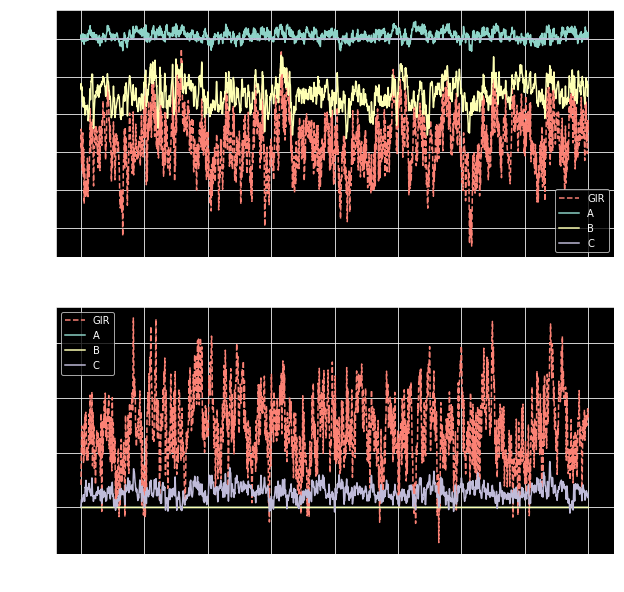

In [38]:
t = np.arange(fi.shape[0])/20
fig,ax = plt.subplots(nrows=2,figsize=(10,10),sharex=True)
ax[0].plot(t,gir_fi[:,0],'C3--',label='GIR')
ax[1].plot(t,gir_fi[:,1],'C3--',label='GIR')
#ax[2].plot(t,gir_fi[:,1],'C3--',label='GIR')
gir = ['A','B','C']
for k in range(2):
    for i in range(3):
        ax[k].plot(t,fi[:,i,k],label=gir[i])
    ax[k].grid()
    ax[k].legend()
ax[0].set_ylabel("Fx [N]")
ax[1].set_ylabel("Fy [N]")
#ax[2].set_ylabel("Fz [N]")
ax[1].set_xlabel("Time [s]")

In [74]:
cp = np.array([x['center_of_pressure'] for x in gmacs])

In [76]:
cp

array([[[-4.275     ,  3.15075159, -1.6200393 ],
        [ 4.275     ,  0.17861784, -5.10489447],
        [ 0.39835043,  4.425     , -4.80252594]],

       [[-4.275     ,  2.84016134, -1.62045377],
        [ 4.275     ,  0.1534633 , -5.11418652],
        [ 0.40541405,  4.425     , -4.77068508]],

       [[-4.275     ,  2.28125548, -2.00708105],
        [ 4.275     ,  0.14802313, -5.12119006],
        [ 0.41513465,  4.425     , -4.75783711]],

       ...,

       [[-4.275     , -0.1926718 , -4.9060026 ],
        [ 4.275     ,  0.43261543, -5.09620074],
        [ 0.26708378,  4.425     , -4.73400774]],

       [[-4.275     , -0.20216738, -4.96810397],
        [ 4.275     ,  0.41920508, -5.04492127],
        [ 0.28419646,  4.425     , -4.77086728]],

       [[-4.275     , -0.21095299, -5.02270791],
        [ 4.275     ,  0.41737817, -5.00484427],
        [ 0.2966898 ,  4.425     , -4.79358182]]])

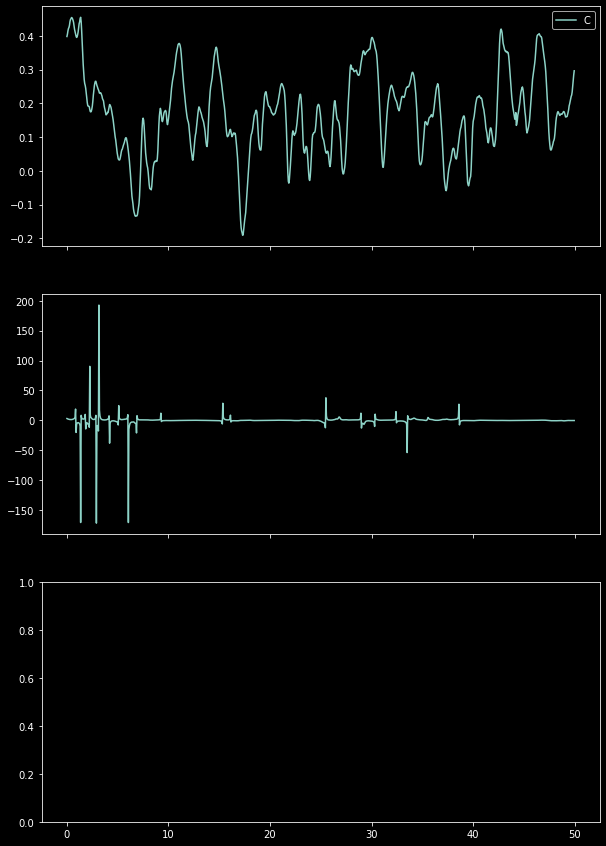

In [79]:
t = np.arange(cp.shape[0])/20
fig,ax = plt.subplots(nrows=3,figsize=(10,15),sharex=True)
gir = ['A','B','C']
ax[0].plot(t,cp[:,2,0],label=gir[i])
ax[0].legend()
ax[1].plot(t,cp[:,0,1],label=gir[i])
